In [11]:
import numpy as np
from scipy import stats as stat
import matplotlib.pyplot as plt
import statistics as stats
import math

When rolling two dice, there is only one way tha you can get snake eyes which is ${1/6*1/6}$, on the contrary you can get to 7 by rolling a 1 and 6, 2 and 5, 3 and 4, etc. 

In [12]:
prob_snake = (1/6)**2 # 1/6 * 1/6
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
convol_2_dice = np.convolve(dice_1, dice_2)

In [13]:
prob_7 = convol_2_dice[7]
print(f'Probability of rolling snake eyes = {prob_snake:.4f}')
print(f'Probability of rolling a 7 = {prob_7:.4f}')
print(f'Ratio of rolling snake eyes vs a 7 = {prob_snake/prob_7}')

Probability of rolling snake eyes = 0.0278
Probability of rolling a 7 = 0.1111
Ratio of rolling snake eyes vs a 7 = 0.25


The analytically way to determine the probability of the sum of 2 six sided dice is done by counting the number of ways a sum can be reached. To get the probabilities, all that is needed to to divide by the total number of occurances. 

Probability dice sum to 2: 0.027778 
Probability dice sum to 3: 0.055556 
Probability dice sum to 4: 0.083333 
Probability dice sum to 5: 0.111111 
Probability dice sum to 6: 0.138889 
Probability dice sum to 7: 0.166667 
Probability dice sum to 8: 0.138889 
Probability dice sum to 9: 0.111111 
Probability dice sum to 10: 0.083333 
Probability dice sum to 11: 0.055556 
Probability dice sum to 12: 0.027778 



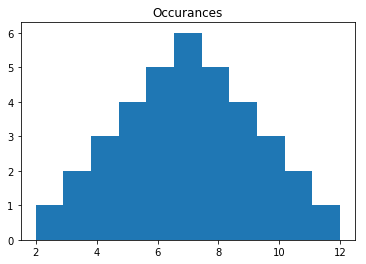

In [14]:
total_poss = [2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12]
list = []
prob_sum_2 = 1
list.append(prob_sum_2)
prob_sum_3 = 2
list.append(prob_sum_3)
prob_sum_4 = 3
list.append(prob_sum_4)
prob_sum_5 = 4
list.append(prob_sum_5)
prob_sum_6 = 5
list.append(prob_sum_6)
prob_sum_7 = 6
list.append(prob_sum_7)
prob_sum_8 = 5
list.append(prob_sum_8)
prob_sum_9 = 4
list.append(prob_sum_9)
prob_sum_10 = 3
list.append(prob_sum_10)
prob_sum_11 = 2
list.append(prob_sum_11)
prob_sum_12 = 1
list.append(prob_sum_12)
total = len(total_poss)

plt.hist(total_poss, bins = 11)
plt.title("Occurances")
for i in range(2, 13):
    print(f'Probability dice sum to {i}: {list[i-2]/total:4f} ')
print()

The numerical way to do this is to use the convolution operator to obtain the probabilities for each sum. 

Probability dice sum to 2: 0.027778 
Probability dice sum to 3: 0.055556 
Probability dice sum to 4: 0.083333 
Probability dice sum to 5: 0.111111 
Probability dice sum to 6: 0.138889 
Probability dice sum to 7: 0.166667 
Probability dice sum to 8: 0.138889 
Probability dice sum to 9: 0.111111 
Probability dice sum to 10: 0.083333 
Probability dice sum to 11: 0.055556 
Probability dice sum to 12: 0.027778 



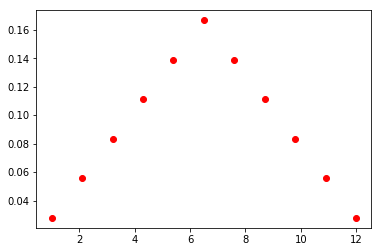

In [15]:
x = np.linspace(1, 12, 11)
plt.plot(x, convol_2_dice, 'ro', lw=0, ms = 6)
for i in range(2, 13):
    print(f'Probability dice sum to {i}: {convol_2_dice[i-2]:4f} ')
print()

In [16]:
mean = stats.mean(total_poss)
for i in range(total):
    total_poss[i] -= mean
    total_poss[i] = total_poss[i]**2

In [17]:
var = math.sqrt(stats.mean(total_poss))
print("Mean = " + str(mean))
print("Variance^2 = " + str(stats.mean(total_poss)))
print("Variance = " + str(var))

Mean = 7
Variance^2 = 5.833333333333333
Variance = 2.41522945769824


This makes sense because the distribution is symmetric. We see that it is symmetric at 7. The variance is calculated by $X = (X- \mu)^2$. Since we know that variance is noted as $\sigma^2$, we can take the square root and see that $\sigma$ = 2.4152

Below, I repeated an average and summing convolution for n = 2,4,6,8,10. I did this using the np.convolve method. I wanted to see the difference between how an average and summation convolution changed the shape of the graph. 

Text(0,0.5,'PDF Probability')

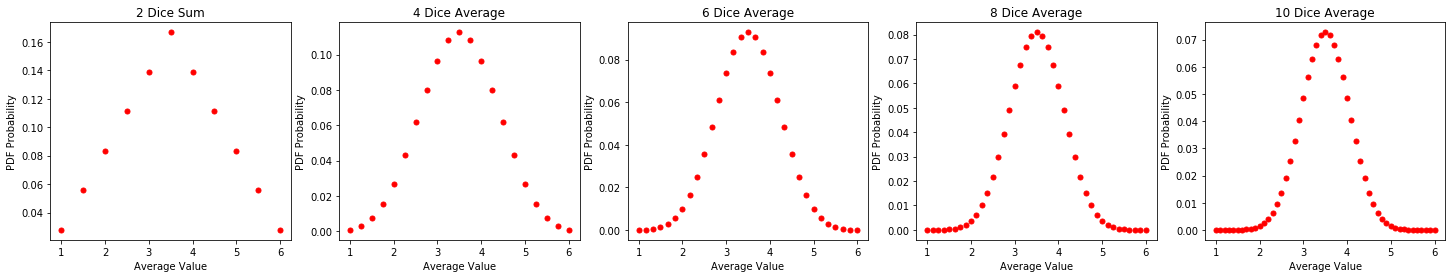

In [18]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
fig, (axs) = plt.subplots(1, 5, figsize = (25, 4))

n = 2
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)/2
axs[0].plot(x, convol, 'ro', lw=0, ms=5)
axs[0].set_title(f'{n} Dice Sum')
axs[0].set_xlabel('Average Value')
axs[0].set_ylabel('PDF Probability')

n = 4
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)/4
axs[1].plot(x, convol, 'ro', lw=0, ms=5)
axs[1].set_title(f'{n} Dice Average')
axs[1].set_xlabel('Average Value')
axs[1].set_ylabel('PDF Probability')

n = 6
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)/6
axs[2].plot(x, convol, 'ro', lw=0, ms=5)
axs[2].set_title(f'{n} Dice Average')
axs[2].set_xlabel('Average Value')
axs[2].set_ylabel('PDF Probability')

n = 8
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)/8
axs[3].plot(x, convol, 'ro', lw=0, ms=5)
axs[3].set_title(f'{n} Dice Average')
axs[3].set_xlabel('Average Value')
axs[3].set_ylabel('PDF Probability')

n = 10
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)/10
axs[4].plot(x, convol, 'ro', lw=0, ms=5)
axs[4].set_title(f'{n} Dice Average')
axs[4].set_xlabel('Average Value')
axs[4].set_ylabel('PDF Probability')

Text(0,0.5,'PDF Probability')

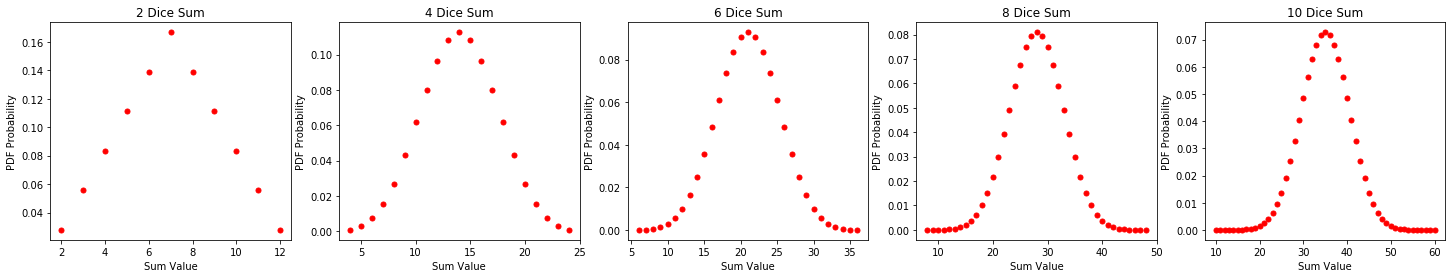

In [19]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
fig, (axs) = plt.subplots(1, 5, figsize = (25, 4))

n = 2
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)
axs[0].plot(x, convol, 'ro', lw=0, ms=5)
axs[0].set_title(f'{n} Dice Sum')
axs[0].set_xlabel('Sum Value')
axs[0].set_ylabel('PDF Probability')

n = 4
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)
axs[1].plot(x, convol, 'ro', lw=0, ms=5)
axs[1].set_title(f'{n} Dice Sum')
axs[1].set_xlabel('Sum Value')
axs[1].set_ylabel('PDF Probability')

n = 6
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)
axs[2].plot(x, convol, 'ro', lw=0, ms=5)
axs[2].set_title(f'{n} Dice Sum')
axs[2].set_xlabel('Sum Value')
axs[2].set_ylabel('PDF Probability')

n = 8
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)
axs[3].plot(x, convol, 'ro', lw=0, ms=5)
axs[3].set_title(f'{n} Dice Sum')
axs[3].set_xlabel('Sum Value')
axs[3].set_ylabel('PDF Probability')

n = 10
convol = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (1,n):
    convol = np.convolve(convol, dice_1)
x = np.linspace(n, n*6, n*5+1)
axs[4].plot(x, convol, 'ro', lw=0, ms=5)
axs[4].set_title(f'{n} Dice Sum')
axs[4].set_xlabel('Sum Value')
axs[4].set_ylabel('PDF Probability')

When looking at the graphs, we see a trend with the summation convolition. The more rolls that occur, which is equal to more convolutions, the sum values grow and the distribution becomes wider which correlates to a bigger variance. This is hard to see because the x-axis limits change per summing convolution. Regarding the average convolution, the variance becomes smaller and we see that because the graphs starts to slowly shrink and 'look' more gaussian. I am not saying that ten rolls will produce a gaussian distribution, but it starts to 'look' that way. According to the Central Limit Theorem, there needs to be many more iterations for this distribution to become gaussian.  

Text(0,0.5,'PDF Probability')

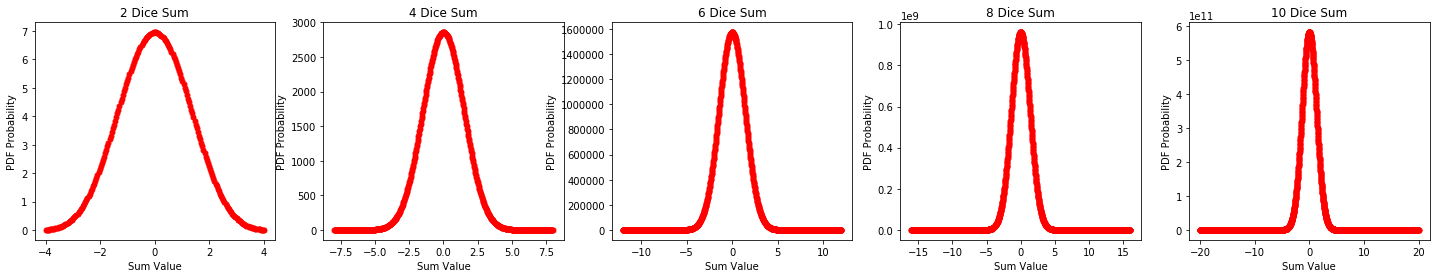

In [20]:
x = np.linspace(-2, 2, 100)
y = stat.norm.pdf(x) 
fig, (axs) = plt.subplots(1, 5, figsize = (25, 4))

n = 2
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 199)
axs[0].plot(x, convol, 'ro', lw=0, ms=5)
axs[0].set_title(f'{n} Dice Sum')
axs[0].set_xlabel('Sum Value')
axs[0].set_ylabel('PDF Probability')

n = 4
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 496)
axs[1].plot(x, convol, 'ro', lw=0, ms=5)
axs[1].set_title(f'{n} Dice Sum')
axs[1].set_xlabel('Sum Value')
axs[1].set_ylabel('PDF Probability')

n = 6
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 991)
axs[2].plot(x, convol, 'ro', lw=0, ms=5)
axs[2].set_title(f'{n} Dice Sum')
axs[2].set_xlabel('Sum Value')
axs[2].set_ylabel('PDF Probability')

n = 8
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 1684)
axs[3].plot(x, convol, 'ro', lw=0, ms=5)
axs[3].set_title(f'{n} Dice Sum')
axs[3].set_xlabel('Sum Value')
axs[3].set_ylabel('PDF Probability')

n = 10
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 2575)
axs[4].plot(x, convol, 'ro', lw=0, ms=5)
axs[4].set_title(f'{n} Dice Sum')
axs[4].set_xlabel('Sum Value')
axs[4].set_ylabel('PDF Probability')



Text(0,0.5,'PDF Probability')

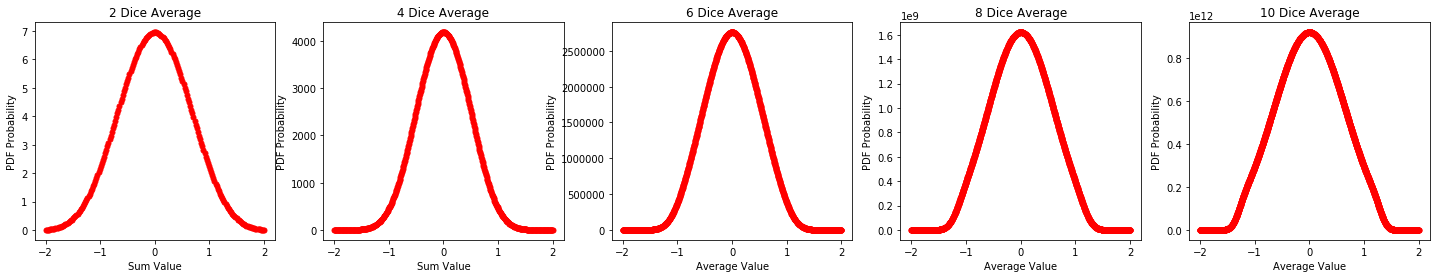

In [21]:
x = np.linspace(-2, 2, 100)
y = stat.norm.pdf(x) 
fig, (axs) = plt.subplots(1, 5, figsize = (25, 4))

n = 2
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 199)/n
axs[0].plot(x, convol, 'ro', lw=0, ms=5)
axs[0].set_title(f'{n} Dice Average')
axs[0].set_xlabel('Sum Value')
axs[0].set_ylabel('PDF Probability')

n = 4
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 496)/n
axs[1].plot(x, convol, 'ro', lw=0, ms=5)
axs[1].set_title(f'{n} Dice Average')
axs[1].set_xlabel('Sum Value')
axs[1].set_ylabel('PDF Probability')

n = 6
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 991)/n
axs[2].plot(x, convol, 'ro', lw=0, ms=5)
axs[2].set_title(f'{n} Dice Average')
axs[2].set_xlabel('Average Value')
axs[2].set_ylabel('PDF Probability')

n = 8
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 1684)/n
axs[3].plot(x, convol, 'ro', lw=0, ms=5)
axs[3].set_title(f'{n} Dice Average')
axs[3].set_xlabel('Average Value')
axs[3].set_ylabel('PDF Probability')

n = 10
convol = stat.norm.pdf(x)
for i in range (1,n):
    convol = np.convolve(convol, y)
x = np.linspace(-2*n, 2*n, 2575)/n
axs[4].plot(x, convol, 'ro', lw=0, ms=5)
axs[4].set_title(f'{n} Dice Average')
axs[4].set_xlabel('Average Value')
axs[4].set_ylabel('PDF Probability')




In class, when using the convolution operator more and more, we start to see small changes over each iteration. The sum gaussian has a greater variance will the average gaussian start to shrink in variance. We know that the average grows at a rate of the ${sqrt(\sigma)}$ and the average decrease by the rate of ${1/sqrt(\sigma)}$